### Mauricio López Coronado

### Act 10

# Variables aleatorias

## Diferentes distribuciones utilizando `numpy`

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Normal

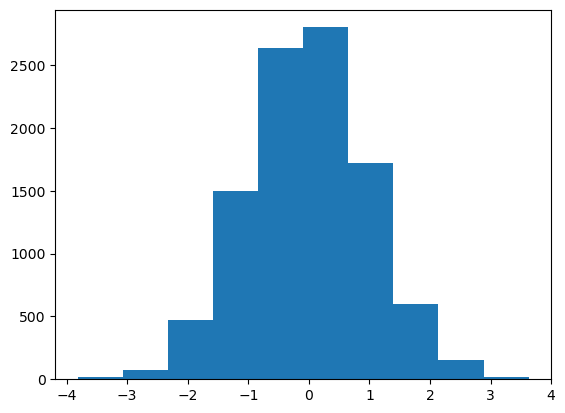

In [7]:
mu = 0
std = 1
plt.hist(np.random.normal(mu, std, 10000));

### Uniforme

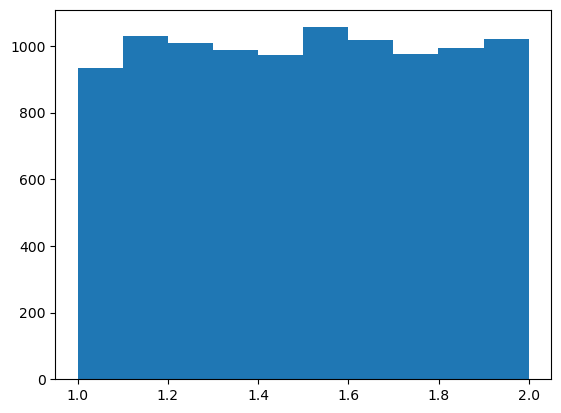

In [10]:
a = 1
b = 2
plt.hist(np.random.uniform(a, b, 10000));

### Bernoulli

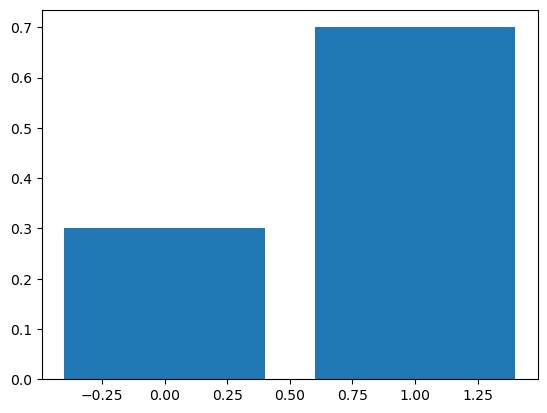

In [13]:
p = 0.7
q = 1-p
plt.bar([0, 1], [q, p]);

### Binomial

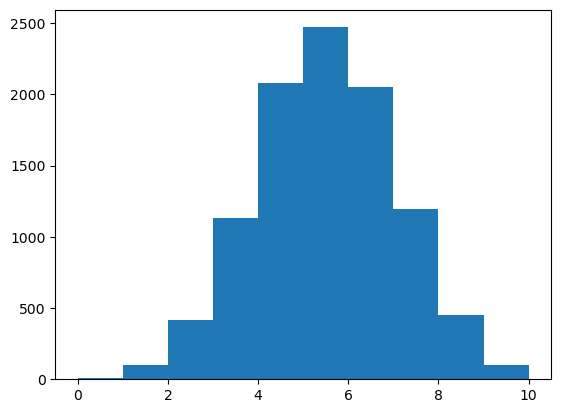

In [16]:
n = 10
p = 0.5
plt.hist(np.random.binomial(n, p, 10000));

### Poisson

(array([4.030e+02, 2.240e+03, 1.725e+03, 3.213e+03, 1.034e+03, 1.064e+03,
        2.670e+02, 3.000e+01, 2.300e+01, 1.000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

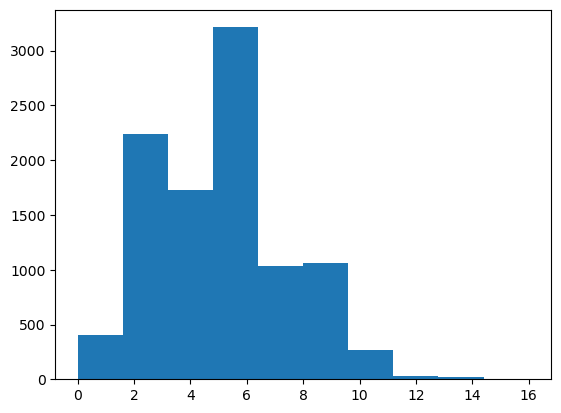

In [19]:
lam = 5
plt.hist(np.random.poisson(lam, 10000))

# Cálculo de probabilidades

### 1.- Avientas un dado tres veces. ¿Cuál es la probabilidad de tirar dos 6 seguidos?

In [26]:
n = 100000
np.random.seed(10)
d1 = np.random.randint(1, 7, n)
d2 = np.random.randint(1, 7, n)
d3 = np.random.randint(1, 7, n)

caso1 = (d1 == 6) & (d2 == 6) & (d3 != 6)
caso2 = (d2 == 6) & (d3 == 6) & (d1 != 6)
caso3 = (d1 == 6) & (d2 == 6) & (d3 == 6)

In [28]:
(caso1.sum() + caso2.sum() + caso3.sum())/n

0.0513

### 2.- Avientas tres dados, uno tras otro. ¿Cuál es la probabilidad de obtener número sólo en orden ascendente?

In [38]:
n = 1000000
np.random.seed(10)
d1 = np.random.randint(1, 7, n)
d2 = np.random.randint(1, 7, n)
d3 = np.random.randint(1, 7, n)

exito = (d3 > d2) & (d2 > d1)
exito.sum()/n

0.093112

### 3.- Tienes una baraja con 100 cartas, con valores del 1 al 100. Tomas dos cartas aleatoriamente sin reemplazo. ¿Cuál es la probabilidad de que una carta valga el doble que la otra?

In [197]:
import numpy as np

n = 1000000
cartas1 = np.random.randint(1,101,n)
cartas2 = np.random.randint(1,101,n)

doble = (cartas1 == 2*cartas2) | (cartas2 ==2*cartas1)
doble.sum()/n


0.010173

### 4.- Tienes dos monedas: una con águila y sello, y la otra con doble sello. Escoges una al azar y la tiras 5 veces; cae sello 5 veces. ¿Cuál es la probabilidad de que tomaste la moneda con doble sello?

### 5.- Dos personas juegan tenis y están empatadas en 40-40. Esto significa que el set continúa hasta que alguien haya anotado 2 puntos sobre el otro:
- Si un jugador anota la puntuación es A-40
- Si el segundo jugador anota la puntuación regresa a 40-40

El jugador 1 tiene una probabilidad de 60\% de ganar cada punto, mientras que la probabilidad del segundo jugador es de 40\%. ¿Cuál es la probabilidad de que el primer jugador gane el set?

### 1.- Menciona tres ejemplos de variables aleatorias discretas:


Un dado

Una ruleta

Cartas

### 2.- Menciona tres ejemplos de variables aleatorias continuas:


Estatura

Edades

Peso de personas

### 3.- Dos equipos juegan una serie de juegos (4 de 7, el que gane 4 juegos gana). Cada equipo tiene un 50% de probabilidad de ganar cada juego (no empates). ¿Cuál es la probabilidad de que la serie se vaya a 7 juegos? (5/16)


In [175]:
import numpy as np

def serie():
    eq1 = 0
    eq2 = 0
    juegos = 0
    
    while eq1 < 4 and  eq2 < 4:
        ganador = np.random.choice([1, 2])
        if ganador == 1:
            eq1 += 1
        else:
            eq2 += 1
        juegos += 1
    return juegos

num_simulaciones = 100000
resultados = [serie() for i in range(num_simulaciones)]  

proba_juegos = resultados.count(7) / num_simulaciones
proba_juegos

0.31055

### 4.- Una en mil personas tienen una enfermedad H, y la prueba de la enfermedad sale correcta 98% de las veces cuando la persona está enferma. Por otro lado, si la persona está enferma la prueba tiene un error del 1%. Si alguien se hace una prueba y sale positiva, ¿cuál es la probabilidad de que tengan la enfermedad? (98/1097)


In [200]:
import numpy as np 

n= 1000

personas = np.random.choice([0,1], n, p=[0.999, 0.001])

t1_d1 = np.random.choice([0, 1], personas.sum(), p=[0.02, 0.98])
t1_d0 = np.random.choice([0, 1], n - personas.sum(),p=[0.99, 0.01])
t1_d1.sum()/(t1_d1.sum() + t1_d0.sum())

0.0862648850104536

### 5.- Tres amigos diferentes te dijeron que está lloviendo, y cada persona tiene 1/3 de probabilidad de mentir. Si el pronóstico del clima dijo que la probabilidad de lluvia era 25%, ¿cuál es la probabilidad de que sí esté lloviendo? (8/11)